# N Body Problem

In physics the problem of two bodies orbiting one another can be solved neatly, and analytically.
Likewise, approximates can be made for a 3 or 4 body system assuming that the additional bodies
have masses much smaller than the original 2. However, as soon as we deal with the problem of
more than 2 bodies of equivalent mass things become chaotic and require numerical methods to
solve them. This is the N-body problem is physics.<br>

The physics of the N-body problem is governed by the equations of gravity so that for the i
th body of the system the force from the other bodies in a system of N-bodies is

$$Fi=M_i a_i=M_i\frac{d^2x}{dt^2}=\sum_{1,i!=j}^N \frac{G M_i M_j}{{|r_i-r_j|}^2}$$

You have the following system, two stars of equal mass orbit around their common center of mass
a distance of 50 AU apart. <br>
A third star with mass of 1/2 that of the inner two stars orbits the center of mass of the system with a pericenter of 30 AU and a apocenter of 2000 AU. The orbit of the 3rd star is also inclined relative to the plane of the inner two stars by 13 degrees. Starting star 3 at its apocenter, <br>

plot the orbit of Star 3 though one orbital period. On the same plot show the orbits of Star
2 and Star 1. Star assuming Star 2 and Star 1 are both 1M. 

<br>

Plot the acceleration and velocities of the three stars as a function of time.
Start your calculation with 1000 timesteps and then explore what occurs when you increase or
decrease the number of timesteps.

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.animation as anim
from matplotlib.patches import Circle

In [144]:
#constants
G=39.478

#M1=M2=M=1 Solar mass
M=1

#M3=M/2

#For star 3
#apocentre
a=2030/2

#epicenter
b=np.sqrt(2000*30)

#period of star 3
p=np.sqrt(2*(a*a*a)/(5*M))


#timesteps
N=1000

#time star 3
t=np.linspace(0,p,N)

#theta (angle in the xy plane)
theta=np.linspace(0,2*np.pi,N)

#delta(inclination with the z axis)
delta=13*(np.pi/180)

#eccentricity of the orbit of 3rd star
e=(a-b)/(a+b)

In [145]:
#Initial conditons for star 3
r0=2000
v0=np.sqrt(G*M/(4*r0))
a0=G*M*M/(r0*r0)

#array s with r and v values
s=np.array([r0,v0])


def f(s,t):
    '''Computes the derivative of s at t=0'''
    r=s[0]
    velocity=s[1]
    
    drdt=velocity
    acceleration=G*M*M/(r*r)
    return np.array([drdt,acceleration],float)


In [146]:
def RK4(s,t):
    '''Solves for r, velocity for star 3'''
    rvec=[]
    velocity=[]
    
    h=t[1]-t[0]
    
    for i in t:
        rvec.append(s[0])
        velocity.append(s[1])
        
        k1=h*f(s,i)
        k2=h*f(s+0.5*k1,i+0.5*h)
        k3=h*f(s+0.5*k2,i+0.5*h)
        k4=h*f(s+k3,i+h)
        s=s+((k1+2*k2+2*k3+k4)/6)
    return rvec,velocity

In [147]:
#r and velocity of star 3
rvec,velocity=RK4(s,t)

#Acceleration of star 3
acceleration=[G*M*M/(r*r)for r in rvec ]


x3=np.zeros(N)
y3=rvec*np.cos(theta)
z3=rvec*np.sin(theta)


v3_x=np.zeros(N)
v3_y=velocity*np.cos(theta)
v3_z=velocity*np.sin(theta)

a3_x=np.zeros(N)
a3_y=acceleration*np.cos(theta)
a3_z=acceleration*np.sin(theta)

In [148]:
#velocity towards the center of mass from star 1/2
v1_0=np.sqrt(G*M/25)

#Acceleration of stars 1,2
a0=G*M*M/(25*25)

a1=np.full(N,a0)

#magnitude of r for star 1
r1=np.full(N,25)

#magnitude of star 2
r2=r1

#position vectors of star 1
x1=r1*np.cos(theta)
y1=r1*np.sin(theta)
z1=np.full(N,0.0)

#velocity vectors of star 1
v1_x=v1_0*np.cos(theta)
v1_y=v1_0*np.sin(theta)
v1_z=np.full(N,0.0)

a1_x=a1*np.cos(theta)
a1_y=a1*np.sin(theta)
a1_z=np.full(N,0.0)

#Position vectors of star 2
x2=r2*np.cos(theta+np.pi)
y2=r2*np.sin(theta+np.pi)
z2=np.full(N,0.0)

#Velocity vectors of star 2
v2_x=v1_0*np.cos(theta+np.pi)
v2_y=v1_0*np.sin(theta+np.pi)
v2_z=np.full(N,0.0)

#Acceleration vectors of star2
a2_x=a1*np.cos(theta+np.pi)
a2_y=a1*np.sin(theta+np.pi)
a2_z=np.full(N,0.0)

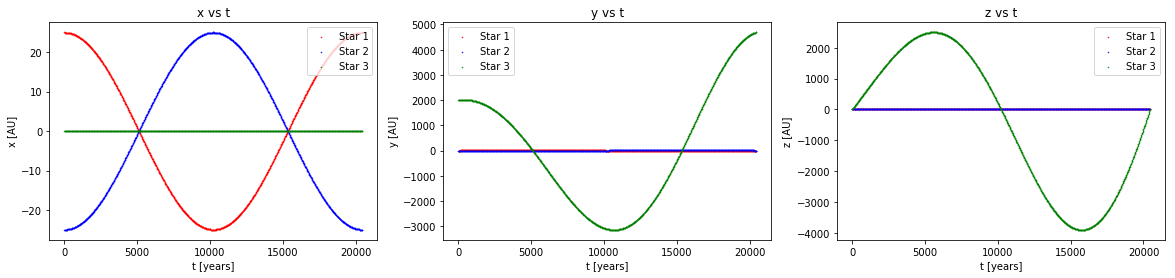

In [149]:
fig=plt.figure(figsize=(20,4))
legend=['Star 1','Star 2','Star 3']

ax=fig.add_subplot(131)
ax.scatter(t,x1,c='r',marker='.',s=1)
ax.scatter(t,x2,c='b',marker='.',s=1)
ax.scatter(t,x3,c='g',marker='.',s=1)
ax.set_title('x vs t')
ax.set_xlabel('t [years]')
ax.set_ylabel('x [AU]')
ax.legend(legend)

ax1=fig.add_subplot(132)
ax1.scatter(t,y1,c='r',marker='.',s=1)
ax1.scatter(t,y2,c='b',marker='.',s=1)
ax1.scatter(t,y3,c='g',marker='.',s=1)
ax1.set_title('y vs t')
ax1.set_xlabel('t [years]')
ax1.set_ylabel('y [AU]')
ax1.legend(legend)

ax2=fig.add_subplot(133)
ax2.scatter(t,z1,c='r',marker='.',s=1)
ax2.scatter(t,z2,c='b',marker='.',s=1)
ax2.scatter(t,z3,c='g',marker='.',s=1)
ax2.set_title('z vs t')
ax2.set_xlabel('t [years]')
ax2.set_ylabel('z [AU]')
ax2.legend(legend)
plt.show()


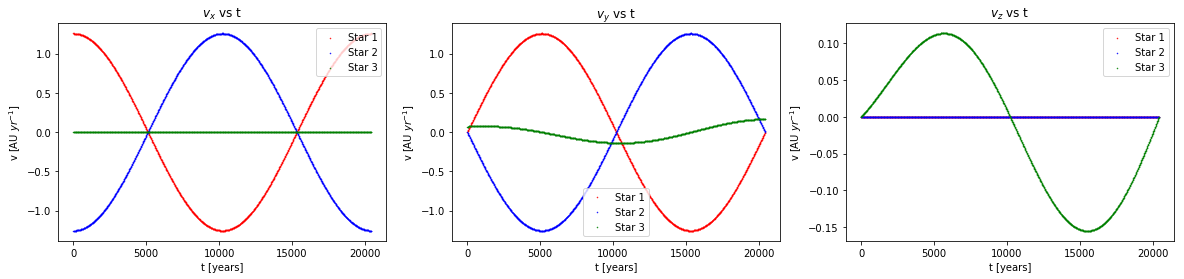

In [150]:
fig1=plt.figure(figsize=(20,4))


ax3=fig1.add_subplot(131)
ax3.scatter(t,v1_x,c='r',marker='.',s=1)
ax3.scatter(t,v2_x,c='b',marker='.',s=1)
ax3.scatter(t,v3_x,c='g',marker='.',s=1)
ax3.set_title('$v_x$ vs t')
ax3.set_xlabel('t [years]')
ax3.set_ylabel('v [AU $yr^{-1}$]')
ax3.legend(legend)

ax4=fig1.add_subplot(132)
ax4.scatter(t,v1_y,c='r',marker='.',s=1)
ax4.scatter(t,v2_y,c='b',marker='.',s=1)
ax4.scatter(t,v3_y,c='g',marker='.',s=1)
ax4.set_title('$v_y$ vs t')
ax4.set_xlabel('t [years]')
ax4.set_ylabel('v [AU $yr^{-1}$]')
ax4.legend(legend)

ax5=fig1.add_subplot(133)
ax5.scatter(t,v1_z,c='r',marker='.',s=1)
ax5.scatter(t,v2_z,c='b',marker='.',s=1)
ax5.scatter(t,v3_z,c='g',marker='.',s=1)
ax5.set_title('$v_z$ vs t')
ax5.set_xlabel('t [years]')
ax5.set_ylabel('v [AU $yr^{-1}$]')
ax5.legend(legend)
plt.show()


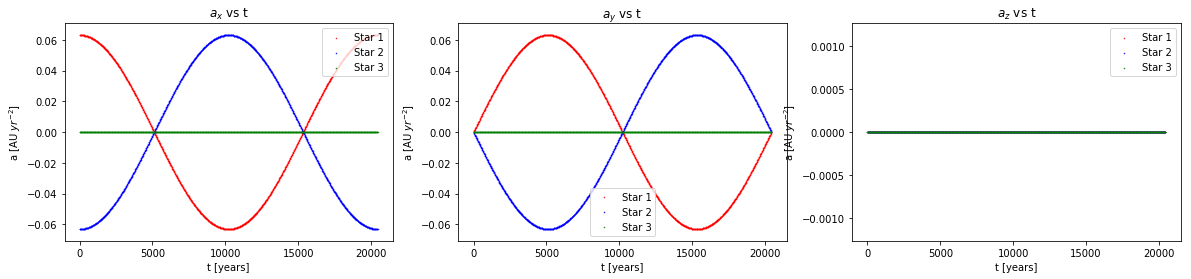

In [151]:
fig2=plt.figure(figsize=(20,4))

ax6=fig2.add_subplot(131)
ax6.scatter(t,a1_x,c='r',marker='.',s=1)
ax6.scatter(t,a2_x,c='b',marker='.',s=1)
ax6.scatter(t,a3_x,c='g',marker='.',s=1)
ax6.set_title('$a_x$ vs t')
ax6.set_xlabel('t [years]')
ax6.set_ylabel('a [AU $yr^{-2}$]')
ax6.legend(legend)

ax7=fig2.add_subplot(132)
ax7.scatter(t,a1_y,c='r',marker='.',s=1)
ax7.scatter(t,a2_y,c='b',marker='.',s=1)
ax7.scatter(t,a3_y,c='g',marker='.',s=1)
ax7.set_title('$a_y$ vs t')
ax7.set_xlabel('t [years]')
ax7.set_ylabel('a [AU $yr^{-2}$]')
ax7.legend(legend)

ax8=fig2.add_subplot(133)
ax8.scatter(t,a1_z,c='r',marker='.',s=1)
ax8.scatter(t,a2_z,c='b',marker='.',s=1)
ax8.scatter(t,a3_z,c='g',marker='.',s=1)
ax8.set_title('$a_z$ vs t')
ax8.set_xlabel('t [years]')
ax8.set_ylabel('a [AU $yr^{-2}$]')
ax8.legend(legend)
plt.show()
